In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

Getting the Base model of VGG16 and freezing it


In [8]:
base_model = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
)
base_model.trainable = False

Adding custom layers at the top to obtain 1 real number as output

In [14]:
x = base_model.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
output = keras.layers.Dense(1, activation='linear')(x)
model = keras.Model(inputs=base_model.input,outputs=output)

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=['mse'])

In [17]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [14]:
model.output_shape

(None, 1)

Loading Dataset

In [ ]:
dataset_x = np.load('faces.npy')
dataset_y = np.load('ages.npy')

In [ ]:
dataset_x.shape
dataset_x[0]

array([[ 61.,  74.,  86., ...,  24.,  22.,  20.],
       [ 62.,  72.,  83., ...,  21.,  20.,  17.],
       [ 61.,  71.,  82., ...,  23.,  17.,  19.],
       ...,
       [231., 231., 240., ..., 114., 126., 132.],
       [228., 229., 234., ..., 118., 131., 135.],
       [228., 228., 230., ..., 123., 136., 142.]], dtype=float32)

In [ ]:
dataset_y.shape

(7500,)

Reshapping the image sizes as per the required Input size of VGG16 model and save the final numpy array

In [ ]:
flag = 0
for dataset in dataset_x:
  # print(dataset.shape)
  dataset = dataset/255.0
  layer = np.pad(dataset,88,mode='constant')  # Centering the Image with pads
  feature = np.stack((layer,)*3,axis=-1) # Duplicating to represent 3 channels
  feature = feature[np.newaxis,:]
  if flag == 0:
    features = feature
    flag = 1
  else:
    features = np.vstack((features,feature))
  print("Featuressss",features.shape)


Streaming output truncated to the last 5000 lines.
Featuressss (2501, 224, 224, 3)
Featuressss (2502, 224, 224, 3)
Featuressss (2503, 224, 224, 3)
Featuressss (2504, 224, 224, 3)
Featuressss (2505, 224, 224, 3)
Featuressss (2506, 224, 224, 3)
Featuressss (2507, 224, 224, 3)
Featuressss (2508, 224, 224, 3)
Featuressss (2509, 224, 224, 3)
Featuressss (2510, 224, 224, 3)
Featuressss (2511, 224, 224, 3)
Featuressss (2512, 224, 224, 3)
Featuressss (2513, 224, 224, 3)
Featuressss (2514, 224, 224, 3)
Featuressss (2515, 224, 224, 3)
Featuressss (2516, 224, 224, 3)
Featuressss (2517, 224, 224, 3)
Featuressss (2518, 224, 224, 3)
Featuressss (2519, 224, 224, 3)
Featuressss (2520, 224, 224, 3)
Featuressss (2521, 224, 224, 3)
Featuressss (2522, 224, 224, 3)
Featuressss (2523, 224, 224, 3)
Featuressss (2524, 224, 224, 3)
Featuressss (2525, 224, 224, 3)
Featuressss (2526, 224, 224, 3)
Featuressss (2527, 224, 224, 3)
Featuressss (2528, 224, 224, 3)
Featuressss (2529, 224, 224, 3)
Featuressss (2530, 22

In [ ]:
np.save('faces_modi.npy',features)

Due to the RAM memory limit, it would crash often and thus frequent loading of the arrays was required

In [ ]:
features = np.load('faces_modi.npy')

In [ ]:
# from keras.src.engine.data_adapter import train_validation_spli
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(features,dataset_y,test_size=0.2,random_state=0)

np.save('x_test.npy',x_test)
np.save('y_test.npy',y_test)


In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.125) # 12.5% * 80% = 10% of Dataset


--------------Misc. code Start---------------

In [ ]:
from google.colab import files
files.download('x_train.zip')
# files.download('y_train.npy')
files.download('x_val.zip')
# files.download('y_val.npy')
files.download('x_test.zip')
# files.download('y_test.npy')


In [ ]:
!zip -r 'x_test.zip' 'x_test.npy'
!zip -r 'x_train.zip' 'x_train.npy'
!zip -r 'x_val.zip' 'x_val.npy'


In [3]:
# x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.125)

# np.save('x_train.npy',x_train)
# np.save('y_train.npy',y_train)
# np.save('x_val.npy',x_val)
# np.save('y_val.npy',y_val)

In [ ]:
!unzip 'x_train.zip'
# !unzip 'x_test.zip'
!unzip 'x_val.zip'


***********Misc. Code END ***********

Loading the Training and Validation sets

In [2]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_val = np.load('x_val.npy')
y_val = np.load('y_val.npy')

Couldnt load both test and train+validation datasets together due to memory issues

In [9]:
x_train = None
y_train = None
x_val = None
y_val = None
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')
# x_test = None
# y_test = None

In [5]:
print(x_train.shape,x_test.shape,x_val.shape)

(5250, 224, 224, 3) (750, 224, 224, 3)


Garbage Collector helps clear useless data occupying the RAM

In [10]:
import gc
gc.collect()

1662

In [20]:
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,batch_size=20)

Epoch 1/10
263/263 [==============================] - 48s 136ms/step - loss: 220.1701 - mse: 220.1701 - val_loss: 182.4178 - val_mse: 182.4178
Epoch 2/10
263/263 [==============================] - 29s 112ms/step - loss: 177.0878 - mse: 177.0878 - val_loss: 172.8644 - val_mse: 172.8644
Epoch 3/10
263/263 [==============================] - 30s 113ms/step - loss: 167.6728 - mse: 167.6728 - val_loss: 190.2123 - val_mse: 190.2123
Epoch 4/10
263/263 [==============================] - 32s 120ms/step - loss: 168.3597 - mse: 168.3597 - val_loss: 165.0739 - val_mse: 165.0739
Epoch 5/10
263/263 [==============================] - 31s 119ms/step - loss: 154.9084 - mse: 154.9084 - val_loss: 162.9529 - val_mse: 162.9529
Epoch 6/10
263/263 [==============================] - 30s 113ms/step - loss: 151.3878 - mse: 151.3878 - val_loss: 162.6715 - val_mse: 162.6715
Epoch 7/10
263/263 [==============================] - 30s 114ms/step - loss: 153.9277 - mse: 153.9277 - val_loss: 160.8408 - val_mse: 160.8408

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

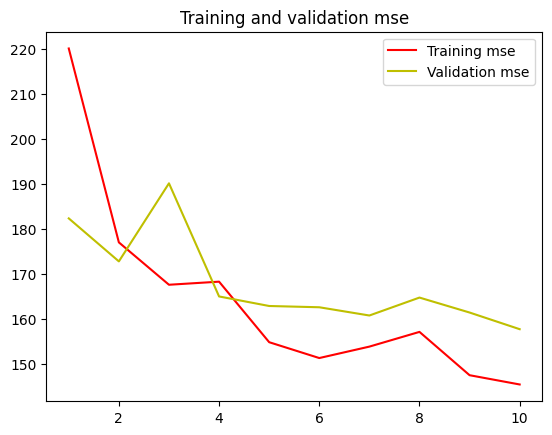

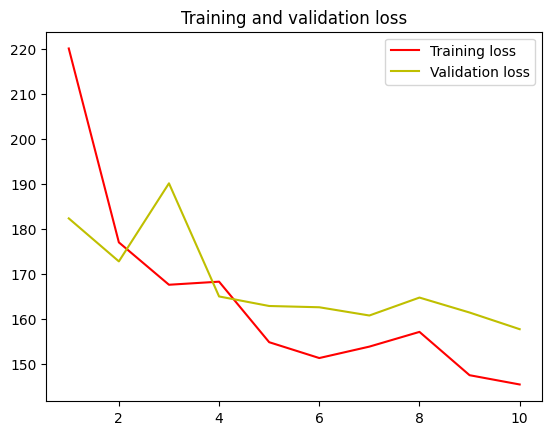

In [27]:
import matplotlib.pyplot as plt

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training mse')
plt.plot(epochs, val_loss, 'y', label='Validation mse')
plt.title('Training and validation mse')
plt.legend()
plt.figure()

plt.show()

In [25]:
test_loss, test_mse = model.evaluate(x_test,  y_test, verbose=2)


47/47 - 15s - loss: 148.4512 - mse: 148.4512 - 15s/epoch - 320ms/step


MSE Validation Loss and Test Loss were already less than 169 (sqrt(169) => 13)  

saving the Model for fine-tuning

# Fine Tuning

In [3]:
# tf.keras.models.save_model(model,'last_layers.h5')
model = tf.keras.models.load_model('last_layers.h5')

In [4]:
# base_model.trainable = True
model.trainable = True

In [5]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=['mse'])

The Hyper-parameter Tuning process took alot of time thus only tried limited variations.

Epochs - [ 10 , 20 ]

Learning Rates - [ 1e-4 , 1e-5 ]

Batch_size - [ 20 , 32(default) ]

In [7]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history2 = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=20,callbacks=[early_stopping],batch_size=20)

Epoch 1/20
263/263 [==============================] - 113s 345ms/step - loss: 264.5435 - mse: 264.5435 - val_loss: 187.7857 - val_mse: 187.7857
Epoch 2/20
263/263 [==============================] - 85s 323ms/step - loss: 153.9708 - mse: 153.9708 - val_loss: 150.2539 - val_mse: 150.2539
Epoch 3/20
263/263 [==============================] - 85s 324ms/step - loss: 129.6646 - mse: 129.6646 - val_loss: 143.1142 - val_mse: 143.1142
Epoch 4/20
263/263 [==============================] - 84s 318ms/step - loss: 104.5193 - mse: 104.5193 - val_loss: 122.4331 - val_mse: 122.4331
Epoch 5/20
263/263 [==============================] - 84s 318ms/step - loss: 97.5338 - mse: 97.5338 - val_loss: 123.9738 - val_mse: 123.9738
Epoch 6/20
263/263 [==============================] - 84s 318ms/step - loss: 82.8085 - mse: 82.8085 - val_loss: 113.6495 - val_mse: 113.6495
Epoch 7/20
263/263 [==============================] - 84s 318ms/step - loss: 68.2309 - mse: 68.2309 - val_loss: 119.6000 - val_mse: 119.6000
Epoc

In [8]:
tf.keras.models.save_model(model,'fine_tuned3.h5')

<ipython-input-8-18fea50cb010>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'fine_tuned3.h5')


In [11]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

47/47 - 15s - loss: 103.7097 - mse: 103.7097 - 15s/epoch - 316ms/step


In [12]:
loss = history2.history['mse']
val_loss = history2.history['val_mse']

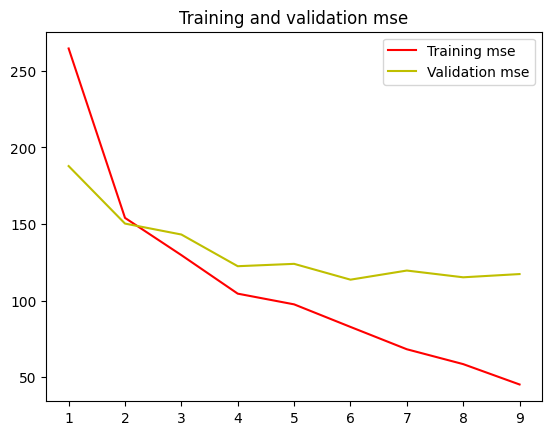

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training mse')
plt.plot(epochs, val_loss, 'y', label='Validation mse')
plt.title('Training and validation mse')
plt.legend()

plt.figure()

plt.show()